In [1]:
import pennylane as qml
from matplotlib import pyplot as plt

# From left to right

/home/jorpena/Documents/Quantum_Solvers/.pixi/envs/default/lib/python3.13/site-packages/pennylane/drawer/mpldrawer.py:620: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Quicksand.
  bbox = text_obj.get_window_extent(renderer)
/home/jorpena/Documents/Quantum_Solvers/.pixi/envs/default/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Quicksand.
  func(*args, **kwargs)
/home/jorpena/Documents/Quantum_Solvers/.pixi/envs/default/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Quicksand.
  fig.canvas.print_figure(bytes_io, **kw)


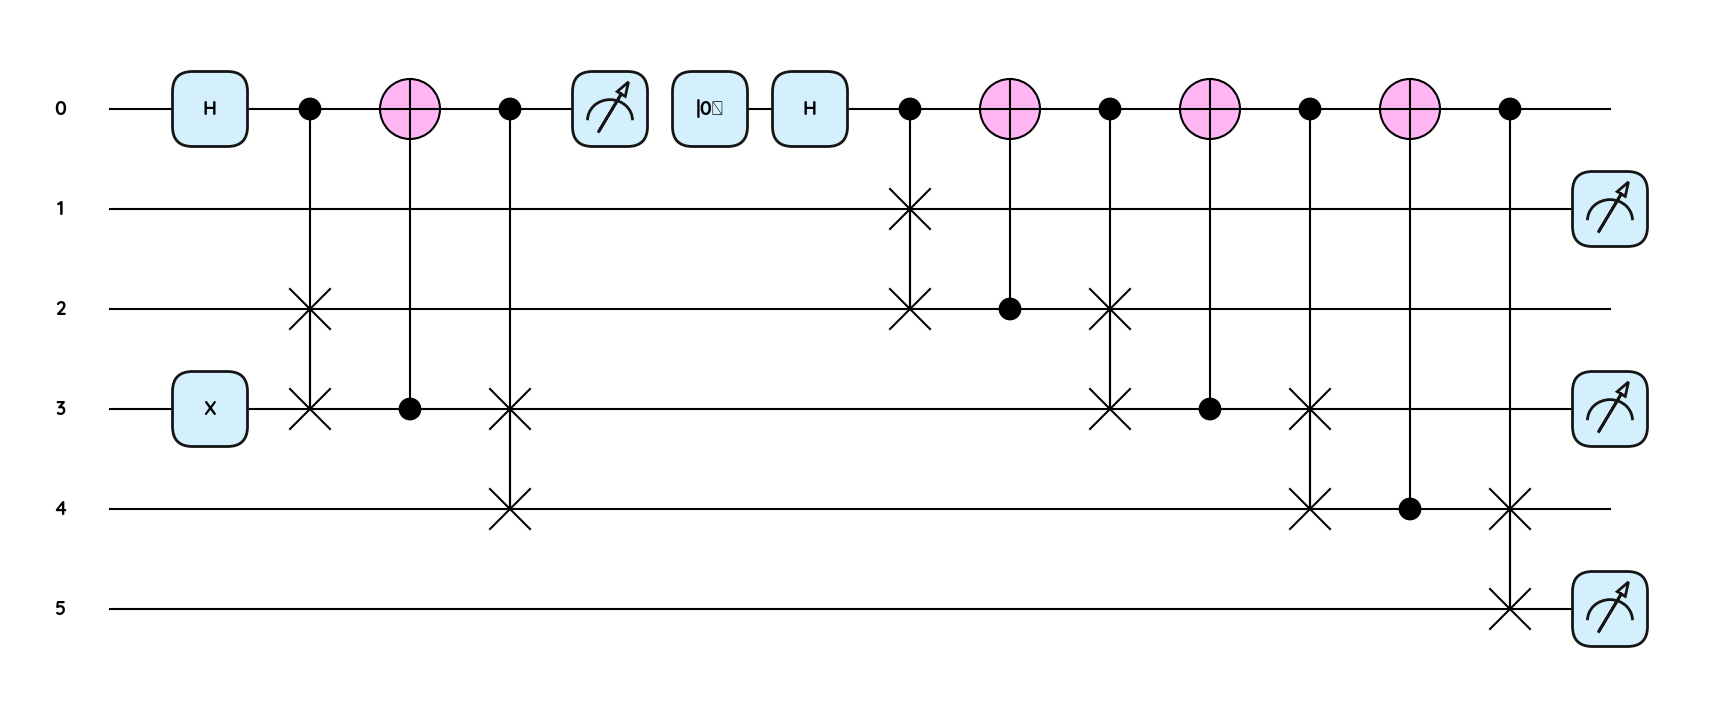

In [2]:
n = 3
dev = qml.device("default.qubit", wires=2*n, shots=10000)

@qml.qnode(dev)
def circuit_left2right():
    # First row
    qml.Hadamard(wires=[0])
    qml.PauliX(wires=[3])
    qml.CSWAP(wires=[0,2,3])
    qml.CNOT(wires=[3,0])
    qml.CSWAP(wires=[0,3,4])
    
    # Reset control wire
    qml.measure(wires=[0], reset=True)
    #qml.cond(m, qml.PauliX)(0)  # If measured as 1, applies NOT

    # Second row
    qml.Hadamard(wires=[0])
    qml.CSWAP(wires=[0, 1, 2])
    qml.CNOT(wires=[2, 0])
    qml.CSWAP(wires=[0, 2, 3])
    qml.CNOT(wires=[3, 0])
    qml.CSWAP(wires=[0, 3, 4])
    qml.CNOT(wires=[4, 0])
    qml.CSWAP(wires=[0, 4, 5])
    
    return qml.probs(wires=[1,3,5])

qml.draw_mpl(circuit_left2right,style='pennylane')(); #draws circuit

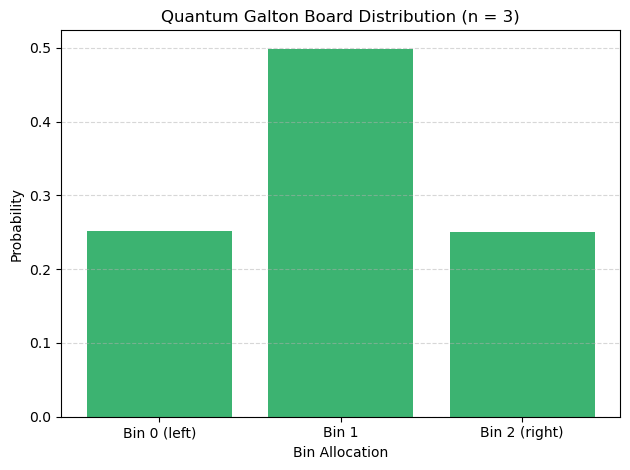

In [8]:
# Run simulation
probs = circuit_left2right()

# Extract probabilities
prob_bin0 = probs[int("100", 2)]
prob_bin1 = probs[int("010", 2)]
prob_bin2 = probs[int("001", 2)]

# Plot
plt.bar([0, 1, 2], [prob_bin0, prob_bin1, prob_bin2], color='mediumseagreen')
plt.xticks([0, 1, 2], ['Bin 0 (left)', 'Bin 1', 'Bin 2 (right)'])
plt.xlabel("Bin Allocation")
plt.ylabel("Probability")
plt.title("Quantum Galton Board Distribution (n = 3)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# From right to left

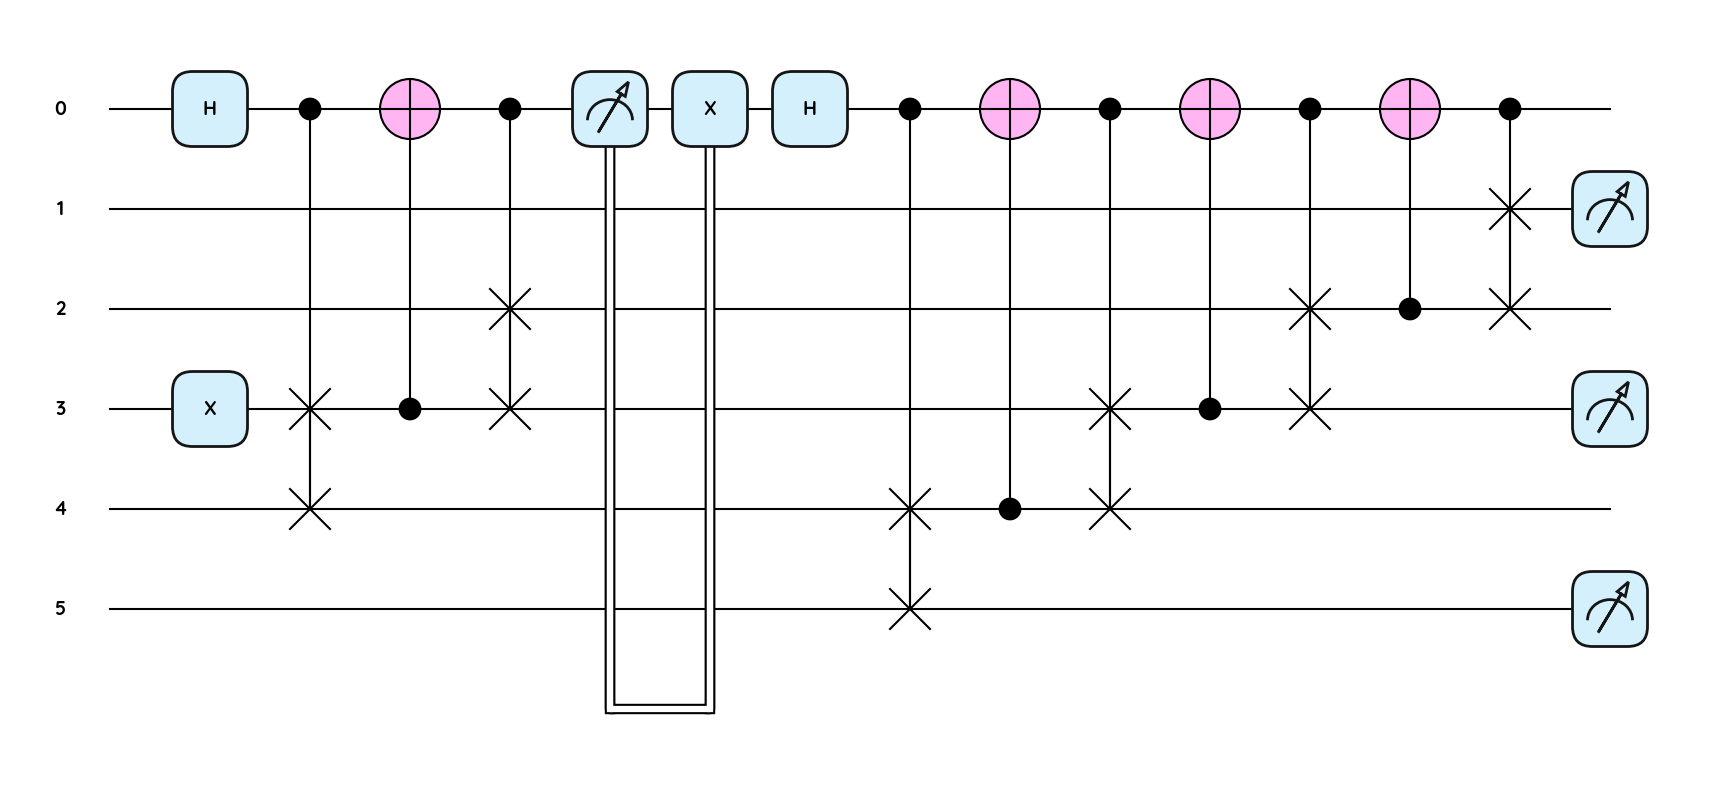

In [11]:
n = 3
dev = qml.device("default.qubit", wires=2*n, shots=10000)

@qml.qnode(dev)
def circuit_right2left():
    # Setup
    qml.Hadamard(wires=[0])
    qml.PauliX(wires=[3])
    
    # First row
    qml.CSWAP(wires=[0,3,4])
    qml.CNOT(wires=[3,0])
    qml.CSWAP(wires=[0,2,3])
    
    # Reset control wire
    m = qml.measure(wires=[0])
    qml.cond(m, qml.PauliX)(0)  # If measured as 1, applies NOT

    # Second row
    qml.Hadamard(wires=[0])
    qml.CSWAP(wires=[0, 4, 5])
    qml.CNOT(wires=[4, 0])
    qml.CSWAP(wires=[0, 3, 4])
    qml.CNOT(wires=[3, 0])
    qml.CSWAP(wires=[0, 2, 3])
    qml.CNOT(wires=[2, 0])
    qml.CSWAP(wires=[0, 1, 2])
    
    return qml.probs(wires=[1,3,5])

qml.draw_mpl(circuit_right2left,style='pennylane')(); #draws circuit

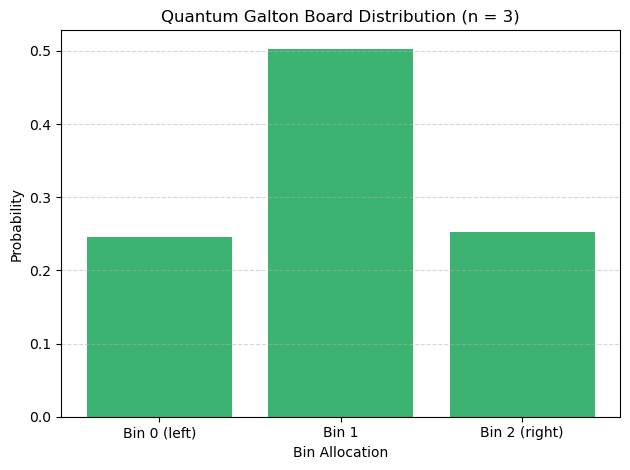

In [12]:
# Run simulation
probs = circuit_right2left()

# Extract probabilities
prob_bin0 = probs[int("100", 2)]
prob_bin1 = probs[int("010", 2)]
prob_bin2 = probs[int("001", 2)]

# Plot
plt.bar([0, 1, 2], [prob_bin0, prob_bin1, prob_bin2], color='mediumseagreen')
plt.xticks([0, 1, 2], ['Bin 0 (left)', 'Bin 1', 'Bin 2 (right)'])
plt.xlabel("Bin Allocation")
plt.ylabel("Probability")
plt.title("Quantum Galton Board Distribution (n = 3)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Left to right first, then right to left

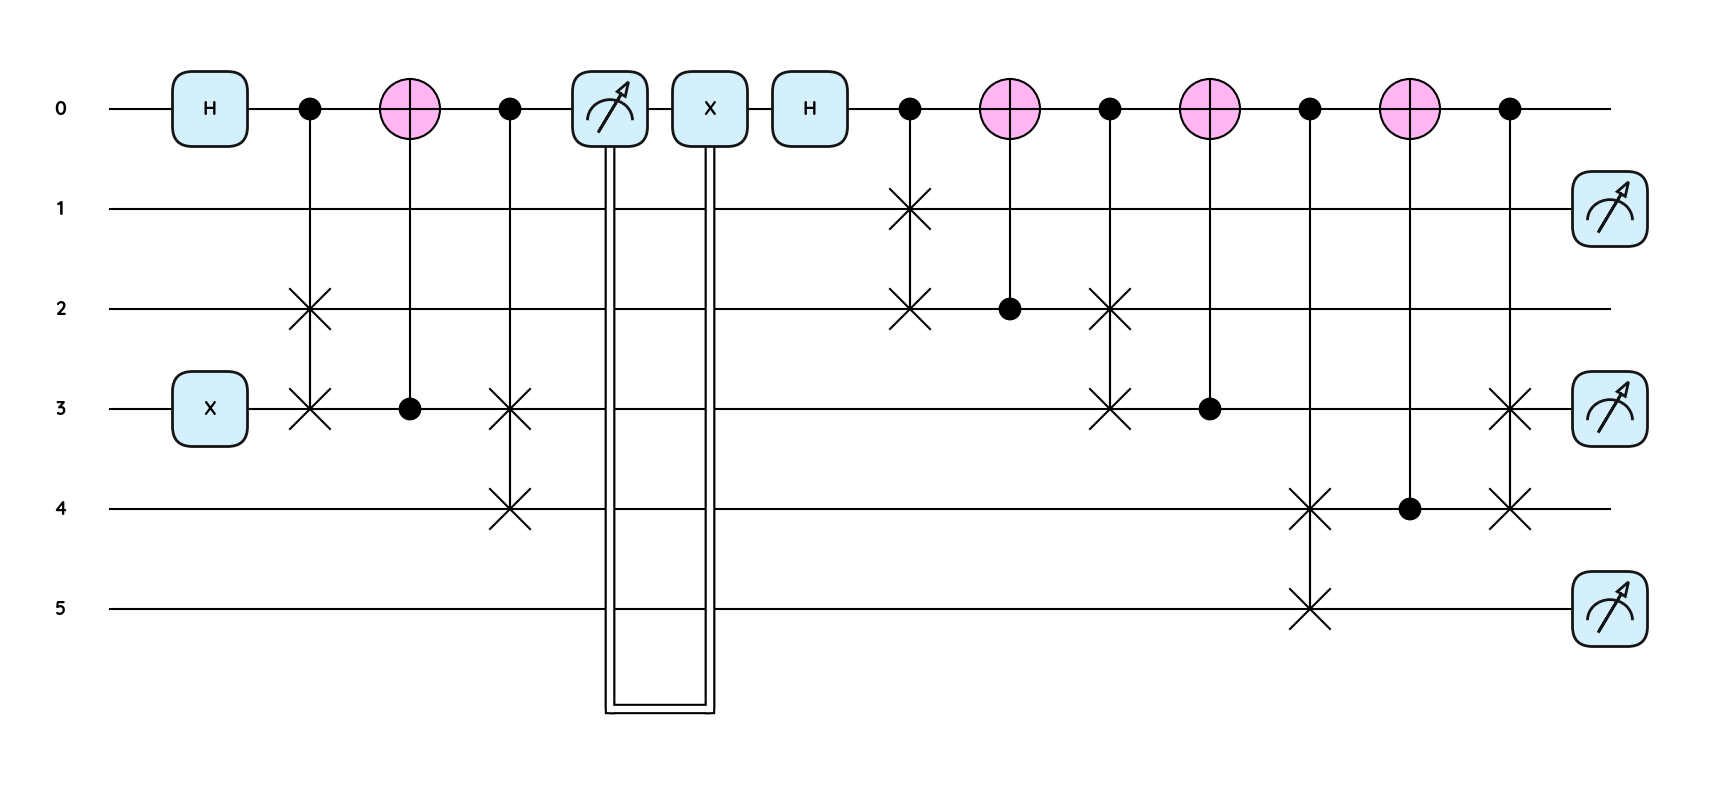

In [16]:
n = 3
dev = qml.device("default.qubit", wires=2*n, shots=10000)

@qml.qnode(dev)
def circuit_l2r_r2l():
    # First row
    qml.Hadamard(wires=[0])
    qml.PauliX(wires=[3])
    qml.CSWAP(wires=[0,2,3])
    qml.CNOT(wires=[3,0])
    qml.CSWAP(wires=[0,3,4])
    
    # Reset control wire
    m = qml.measure(wires=[0])
    qml.cond(m, qml.PauliX)(0)  # If measured as 1, applies NOT

    # Second row
    qml.Hadamard(wires=[0])
    qml.CSWAP(wires=[0, 1, 2])
    qml.CNOT(wires=[2, 0])
    qml.CSWAP(wires=[0, 2, 3])
    qml.CNOT(wires=[3, 0])
    qml.CSWAP(wires=[0, 4, 5])
    qml.CNOT(wires=[4, 0])
    qml.CSWAP(wires=[0, 3, 4])
    
    return qml.probs(wires=[1,3,5])

qml.draw_mpl(circuit_l2r_r2l,style='pennylane')(); #draws circuit

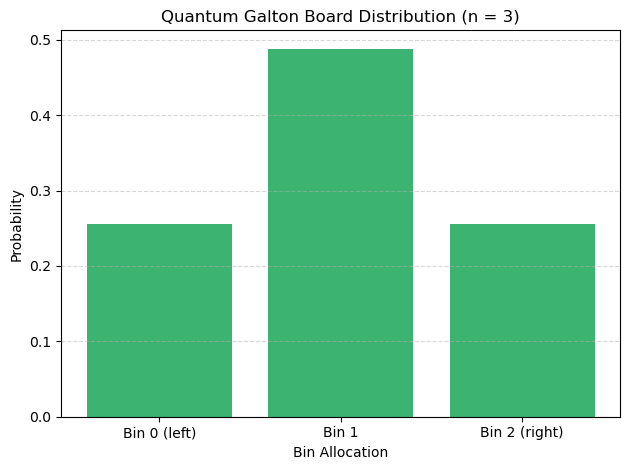

In [17]:
# Run simulation
probs = circuit_l2r_r2l()

# Extract probabilities
prob_bin0 = probs[int("100", 2)]
prob_bin1 = probs[int("010", 2)]
prob_bin2 = probs[int("001", 2)]

# Plot
plt.bar([0, 1, 2], [prob_bin0, prob_bin1, prob_bin2], color='mediumseagreen')
plt.xticks([0, 1, 2], ['Bin 0 (left)', 'Bin 1', 'Bin 2 (right)'])
plt.xlabel("Bin Allocation")
plt.ylabel("Probability")
plt.title("Quantum Galton Board Distribution (n = 3)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()